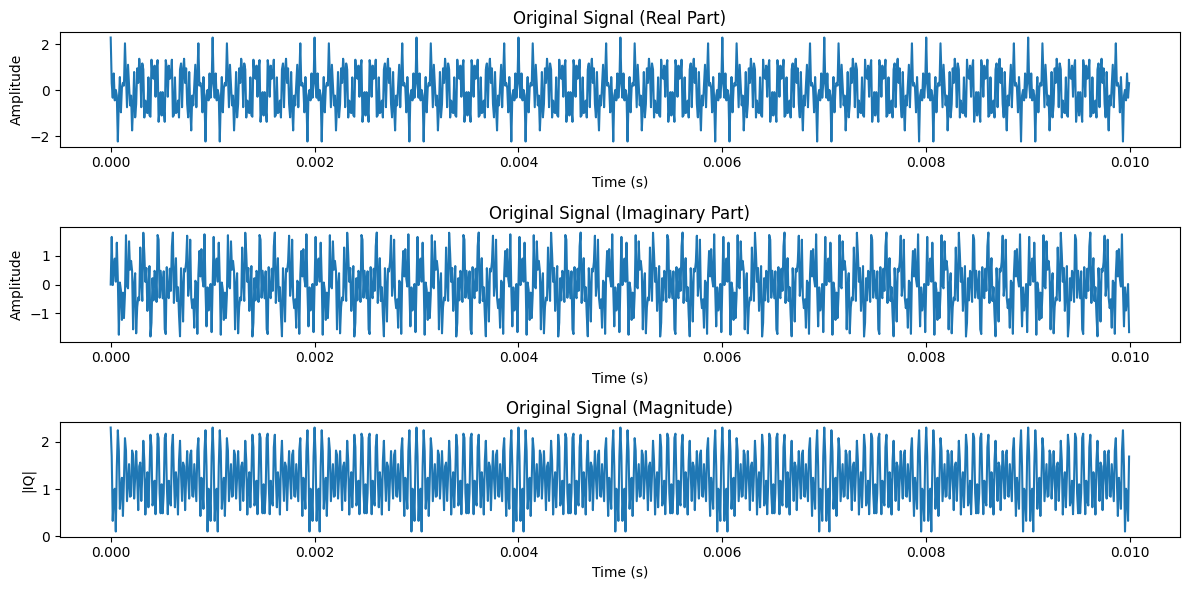

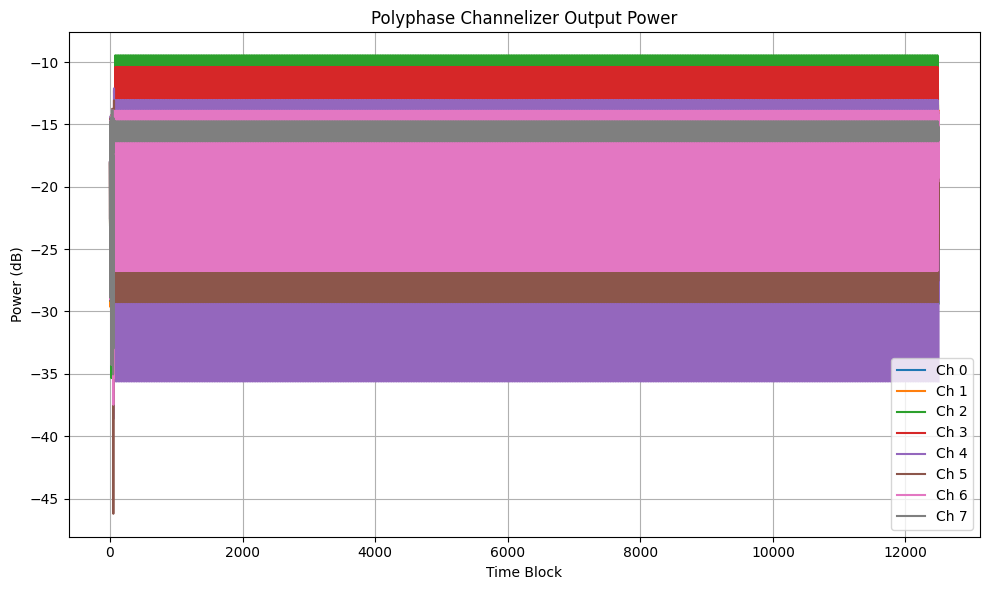

In [1]:
import numpy as np
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt

class PolyphaseChannelizer:
    def __init__(self, num_channels=8, filter_len=64, fs=1.0):
        self.M = num_channels
        self.L = filter_len
        self.fs = fs
        self.h = firwin(self.L * self.M, cutoff=1/self.M, window='hamming')
        self.poly_filters = self.h.reshape((self.M, self.L))

    def channelize(self, signal):
        pad_len = (-len(signal)) % self.M
        signal_padded = np.concatenate([signal, np.zeros(pad_len, dtype=complex)])

        num_blocks = len(signal_padded) // self.M
        signal_blocks = signal_padded[:num_blocks*self.M].reshape((-1, self.M)).T  # [M, num_blocks]

        filtered = np.zeros_like(signal_blocks, dtype=complex)
        for i in range(self.M):
            filtered[i] = lfilter(self.poly_filters[i], [1.0], signal_blocks[i])

        output = np.fft.fft(filtered, axis=0)
        return output

# -------------------------------------------------------------------------
# 🧪 Example usage with original signal plotting
# -------------------------------------------------------------------------
if __name__ == "__main__":
    fs = 100_000  # 100 kHz
    duration = 1.0
    t = np.arange(0, duration, 1/fs)

    # Composite signal with 3 tones
    sig = (0.8 * np.exp(1j * 2 * np.pi * 7e3 * t) +
           0.6 * np.exp(1j * 2 * np.pi * 22e3 * t) +
           0.9 * np.exp(1j * 2 * np.pi * 35e3 * t))

    # 🌟 Plot original signal (real, imag, magnitude)
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(t[:1000], sig.real[:1000])
    plt.title("Original Signal (Real Part)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 2)
    plt.plot(t[:1000], sig.imag[:1000])
    plt.title("Original Signal (Imaginary Part)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    plt.subplot(3, 1, 3)
    plt.plot(t[:1000], np.abs(sig[:1000]))
    plt.title("Original Signal (Magnitude)")
    plt.xlabel("Time (s)")
    plt.ylabel("|IQ|")
    plt.tight_layout()
    plt.show()

    # 🧱 Run channelizer
    chan = PolyphaseChannelizer(num_channels=8, filter_len=64, fs=fs)
    channels = chan.channelize(sig)

    # 📊 Plot channel power
    powers = 10 * np.log10(np.abs(channels)**2 + 1e-12)
    plt.figure(figsize=(10, 6))
    for i in range(chan.M):
        plt.plot(powers[i], label=f'Ch {i}')
    plt.title("Polyphase Channelizer Output Power")
    plt.xlabel("Time Block")
    plt.ylabel("Power (dB)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


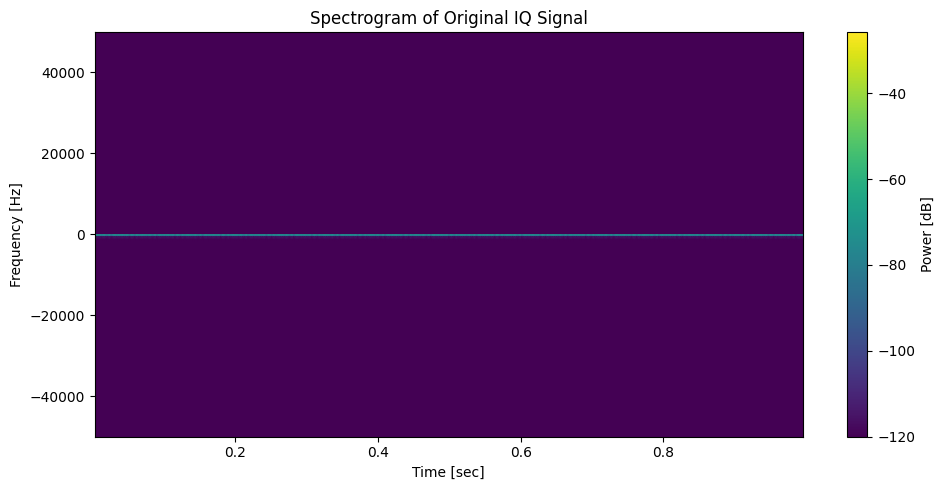

In [2]:
import numpy as np
from scipy.signal import firwin, lfilter, spectrogram
import matplotlib.pyplot as plt

class PolyphaseChannelizer:
    def __init__(self, num_channels=8, filter_len=64, fs=1.0):
        self.M = num_channels
        self.L = filter_len
        self.fs = fs
        self.h = firwin(self.L * self.M, cutoff=1/self.M, window='hamming')
        self.poly_filters = self.h.reshape((self.M, self.L))

    def channelize(self, signal):
        pad_len = (-len(signal)) % self.M
        signal_padded = np.concatenate([signal, np.zeros(pad_len, dtype=complex)])

        num_blocks = len(signal_padded) // self.M
        signal_blocks = signal_padded[:num_blocks*self.M].reshape((-1, self.M)).T  # [M, num_blocks]

        filtered = np.zeros_like(signal_blocks, dtype=complex)
        for i in range(self.M):
            filtered[i] = lfilter(self.poly_filters[i], [1.0], signal_blocks[i])

        output = np.fft.fft(filtered, axis=0)
        return output

# -------------------------------------------------------------------------
# 🧪 Example usage with spectrogram
# -------------------------------------------------------------------------
if __name__ == "__main__":
    fs = 100_000  # 100 kHz
    duration = 1.0
    t = np.arange(0, duration, 1/fs)

    # Composite signal with 3 tones
    sig = (0.8 * np.exp(1j * 2 * np.pi * 7e3 * t) +
           0.6 * np.exp(1j * 2 * np.pi * 22e3 * t) +
           0.9 * np.exp(1j * 2 * np.pi * 35e3 * t))

    # 🌈 Spectrogram
    f, t_spec, Sxx = spectrogram(sig, fs=fs, window='hann',
                                 nperseg=512, noverlap=256,
                                 nfft=1024, return_onesided=False,
                                 scaling='density', mode='complex')

    Sxx_dB = 10 * np.log10(np.abs(Sxx)**2 + 1e-12)

    plt.figure(figsize=(10, 5))
    plt.pcolormesh(t_spec, f, Sxx_dB, shading='gouraud')
    plt.title("Spectrogram of Original IQ Signal")
    plt.xlabel("Time [sec]")
    plt.ylabel("Frequency [Hz]")
    plt.colorbar(label="Power [dB]")
    plt.tight_layout()
    plt.show()


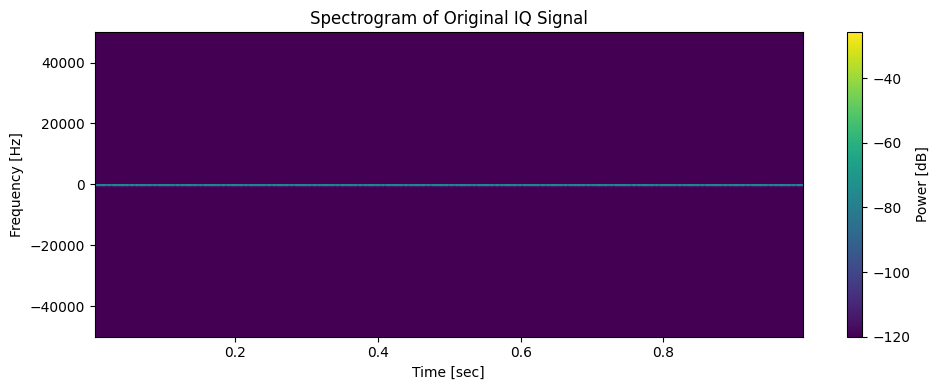

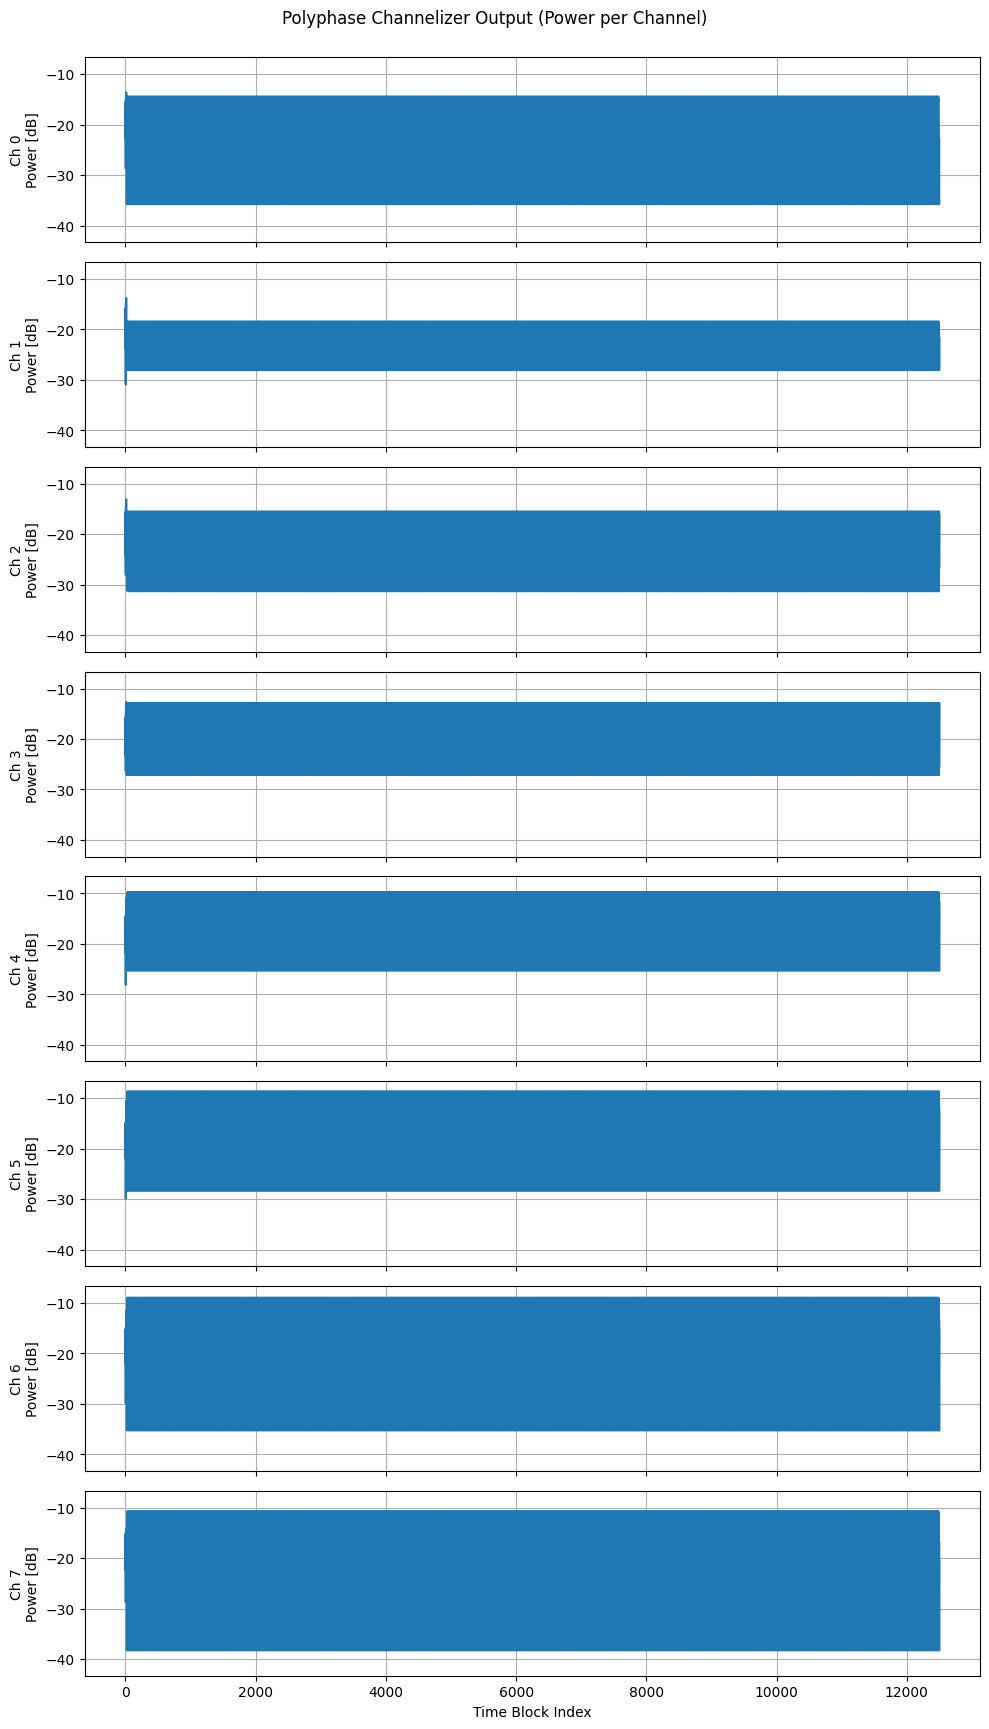

In [6]:
import numpy as np
from scipy.signal import firwin, lfilter, spectrogram
import matplotlib.pyplot as plt

class PolyphaseChannelizer:
    def __init__(self, num_channels=8, filter_len=64, fs=1.0):
        self.M = num_channels
        self.L = filter_len
        self.fs = fs
        self.h = firwin(self.L * self.M, cutoff=1/self.M, window='hamming')
        self.poly_filters = self.h.reshape((self.M, self.L))

    def channelize(self, signal):
        pad_len = (-len(signal)) % self.M
        signal_padded = np.concatenate([signal, np.zeros(pad_len, dtype=complex)])

        num_blocks = len(signal_padded) // self.M
        signal_blocks = signal_padded[:num_blocks*self.M].reshape((-1, self.M)).T  # [M, num_blocks]

        filtered = np.zeros_like(signal_blocks, dtype=complex)
        for i in range(self.M):
            filtered[i] = lfilter(self.poly_filters[i], [1.0], signal_blocks[i])

        output = np.fft.fft(filtered, axis=0)
        return output

# -------------------------------------------------------------------------
# 🧪 Example usage with spectrogram + channelized output subplot
# -------------------------------------------------------------------------
if __name__ == "__main__":
    fs = 100_000  # 100 kHz
    duration = 1.0
    t = np.arange(0, duration, 1/fs)

    # Composite IQ signal
    sig = (0.8 * np.exp(1j * 2 * np.pi * 7e3 * t) +
           0.6 * np.exp(1j * 2 * np.pi * 22e3 * t) +
           0.9 * np.exp(1j * 2 * np.pi * 35e3 * t))

    # 🌈 Plot spectrogram of original IQ signal
    f, t_spec, Sxx = spectrogram(sig, fs=fs, window='hann',
                                 nperseg=512, noverlap=256,
                                 nfft=1024, return_onesided=False,
                                 scaling='density', mode='complex')
    Sxx_dB = 10 * np.log10(np.abs(Sxx)**2 + 1e-12)

    plt.figure(figsize=(10, 4))
    plt.pcolormesh(t_spec, f, Sxx_dB, shading='gouraud')
    plt.title("Spectrogram of Original IQ Signal")
    plt.xlabel("Time [sec]")
    plt.ylabel("Frequency [Hz]")
    plt.colorbar(label="Power [dB]")
    plt.tight_layout()
    plt.show()

    # ⛓️ Channelize
    chan = PolyphaseChannelizer(num_channels=8, filter_len=16, fs=fs)
    channels = chan.channelize(sig)
    powers = 10 * np.log10(np.abs(channels)**2 + 1e-12)  # [channels, time blocks]

    # 📊 Plot each channel separately (power over time)
    num_channels = chan.M
    fig, axs = plt.subplots(num_channels, 1, figsize=(10, 2.2*num_channels), sharex=True)

    for i in range(num_channels):
        axs[i].plot(powers[i])
        axs[i].set_ylabel(f"Ch {i}\nPower [dB]")
        axs[i].grid(True)
        axs[i].set_ylim([np.min(powers)-5, np.max(powers)+2])

    axs[-1].set_xlabel("Time Block Index")
    fig.suptitle("Polyphase Channelizer Output (Power per Channel)")
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()


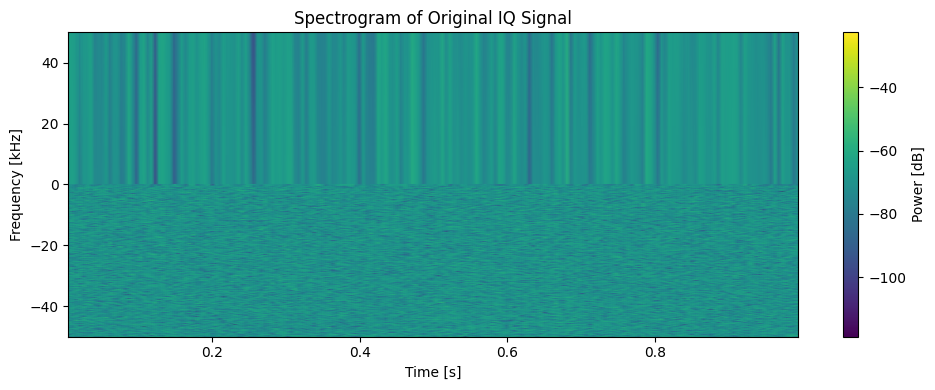

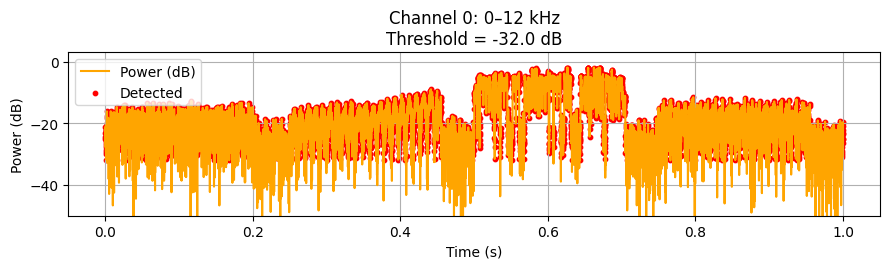

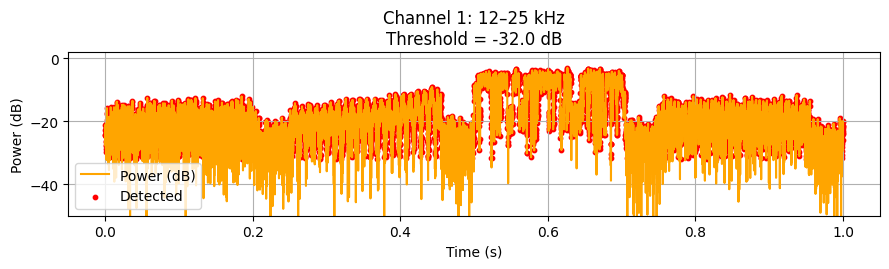

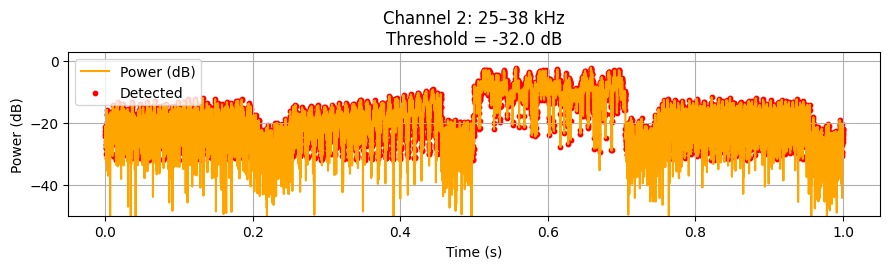

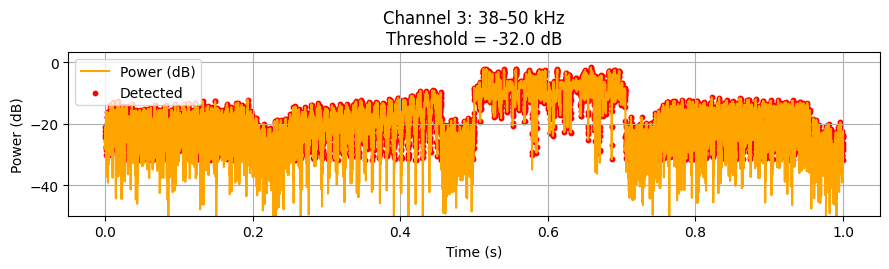

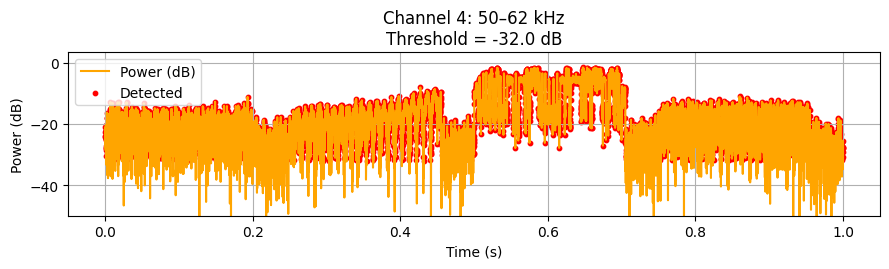

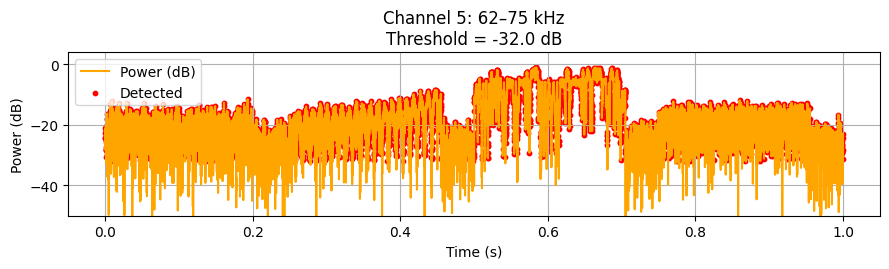

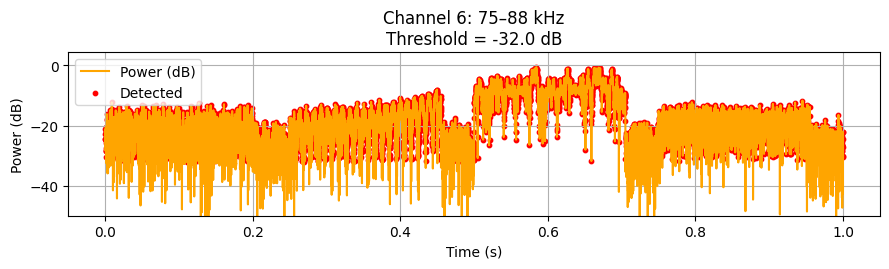

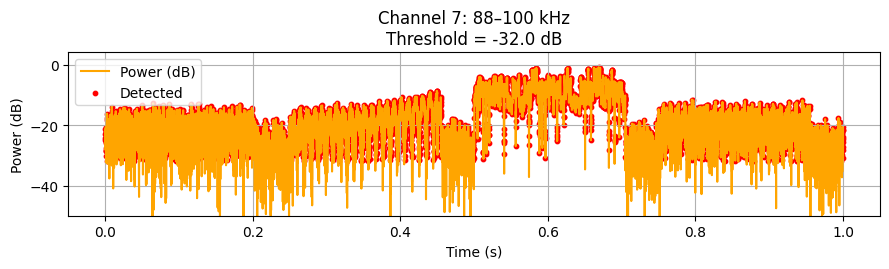

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, spectrogram

# 1. IQ 시그널 생성
fs = 100_000           # 100 kHz sampling rate
duration = 1.0         # 1 second
t = np.arange(0, duration, 1 / fs)

wave_types = ['bpsk', 'qpsk', 'chirp', 'ofdm']
rng = np.random.default_rng(seed=10)
center_freqs = rng.uniform(3_000, 38_000, size=4)
amplitudes = rng.uniform(0.3, 1.2, size=4)
order = rng.permutation(4)
slot_len = duration / 4
events = []

for idx, slot_id in enumerate(order):
    start = idx * slot_len
    end = start + slot_len * 0.8
    f0 = center_freqs[slot_id]
    amp = amplitudes[slot_id]
    wtype = wave_types[slot_id]
    events.append((start, end, f0, amp, wtype))

x = np.zeros_like(t, dtype=complex)
noise_power = 0.02
x += np.sqrt(noise_power / 2) * (rng.standard_normal(x.size) + 1j * rng.standard_normal(x.size))

for start, end, f0, amp, wtype in events:
    idx_mask = (t >= start) & (t < end)
    tt = t[idx_mask] - start
    dur = end - start
    phase0 = 2 * np.pi * rng.random()

    if wtype == 'bpsk':
        sym_rate = 500
        sym_samp = int(fs / sym_rate)
        num_sym = int(np.ceil(tt.size / sym_samp))
        bits = rng.choice([-1, 1], size=num_sym)
        bpsk_seq = np.repeat(bits, sym_samp)[:tt.size]
        carrier = np.exp(1j * (2 * np.pi * f0 * tt + phase0))
        x[idx_mask] += amp * bpsk_seq * carrier

    elif wtype == 'qpsk':
        sym_rate = 500
        sym_samp = int(fs / sym_rate)
        num_sym = int(np.ceil(tt.size / sym_samp))
        bits_i = rng.choice([-1, 1], size=num_sym)
        bits_q = rng.choice([-1, 1], size=num_sym)
        qpsk_seq = (bits_i + 1j * bits_q) / np.sqrt(2)
        qpsk_seq = np.repeat(qpsk_seq, sym_samp)[:tt.size]
        carrier = np.exp(1j * (2 * np.pi * f0 * tt + phase0))
        x[idx_mask] += amp * qpsk_seq * carrier

    elif wtype == 'chirp':
        k = 4000 / dur
        inst_phase = 2 * np.pi * (f0 * tt + 0.5 * k * (tt ** 2))
        x[idx_mask] += amp * np.exp(1j * (inst_phase + phase0))

    elif wtype == 'ofdm':
        num_subcarriers = 8
        spacing = 100
        ofdm_sig = np.zeros_like(tt, dtype=complex)
        for k_sub in range(num_subcarriers):
            fk = f0 + (k_sub - num_subcarriers // 2) * spacing
            ph = 2 * np.pi * rng.random()
            sign = rng.choice([-1, 1])
            ofdm_sig += sign * np.exp(1j * (2 * np.pi * fk * tt + ph))
        ofdm_sig /= np.sqrt(num_subcarriers)
        x[idx_mask] += amp * ofdm_sig

# 🌈 원 시그널 x의 Spectrogram 시각화
f_spec, t_spec, Sxx = spectrogram(x, fs=fs, window='hann',
                                  nperseg=1024, noverlap=512,
                                  nfft=2048, return_onesided=False,
                                  scaling='density', mode='complex')

Sxx_dB = 10 * np.log10(np.abs(Sxx)**2 + 1e-12)

plt.figure(figsize=(10, 4))
plt.pcolormesh(t_spec, f_spec / 1000, Sxx_dB, shading='gouraud')
plt.title("Spectrogram of Original IQ Signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [kHz]")
plt.colorbar(label="Power [dB]")
plt.tight_layout()
plt.show()

# 2. Polyphase Channelizer
class PolyphaseChannelizer:
    def __init__(self, num_channels=8, filter_len=64, fs=1.0):
        self.M = num_channels
        self.L = filter_len
        self.fs = fs
        self.h = firwin(self.L * self.M, cutoff=1/self.M, window='hamming')
        self.poly_filters = self.h.reshape((self.M, self.L))

    def channelize(self, signal):
        pad_len = (-len(signal)) % self.M
        signal_padded = np.concatenate([signal, np.zeros(pad_len, dtype=complex)])
        num_blocks = len(signal_padded) // self.M
        signal_blocks = signal_padded[:num_blocks*self.M].reshape((-1, self.M)).T
        filtered = np.zeros_like(signal_blocks, dtype=complex)
        for i in range(self.M):
            filtered[i] = lfilter(self.poly_filters[i], [1.0], signal_blocks[i])
        output = np.fft.fft(filtered, axis=0)
        return output

# 3. 채널화 및 파워 계산
chan = PolyphaseChannelizer(num_channels=8, filter_len=64, fs=fs)
channels = chan.channelize(x)
powers_db = 10 * np.log10(np.abs(channels)**2 + 1e-12)
fs_block = fs / chan.M
time_axis = np.arange(powers_db.shape[1]) / fs_block

# 4. 채널별 시각화 + Detection
threshold_db = -32.0
for i in range(chan.M):
    f_lower = i * (fs / chan.M) / 1000
    f_upper = (i + 1) * (fs / chan.M) / 1000
    detected = powers_db[i] > threshold_db

    plt.figure(figsize=(9, 2.8))
    plt.plot(time_axis, powers_db[i], color='orange', label="Power (dB)")
    plt.scatter(time_axis[detected], powers_db[i][detected], color='red', s=10, label="Detected")
    plt.title(f"Channel {i}: {f_lower:.0f}–{f_upper:.0f} kHz\nThreshold = {threshold_db:.1f} dB")
    plt.xlabel("Time (s)")
    plt.ylabel("Power (dB)")
    plt.ylim([-50, np.max(powers_db[i]) + 5])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
